# Explanation of Cosmological Parameters Calculation

## Summary
In this notebook, we will outline our procedure for calculating the cosmological parameters $\Omega_{m,0}$, $\Omega_{\Lambda,0}$, and $H_0$ from observations of Type 1a supernovae. We will start with datasets describing supernovae redshifts and luminosity distances from several important papers on the topic. We will fit this data to a model relating redshifts, luminosity distances, and cosmological parameters in order to solve for the best fit values of $\Omega_{m,0}$, $\Omega_{\Lambda,0}$, and $H_0$. We will conclude by comparing our parameters to the accepted results and discussing the implications of these parameters for the history and fate of our universe.

## Preliminaries
Let's start by importing the packages we will need, defining the relevant constants, and reading in the redshift and luminosity distance data.

In [1]:
# packages
import numpy as np
import scipy.integrate as integrate
import scipy.optimize as opt
import matplotlib.pyplot as plt

In [2]:
# constant
c = 2.99792458 * 1e8

In [3]:
# replace this with import of actual data
# this temporary data comes from https://imagine.gsfc.nasa.gov/educators/programs/cosmictimes/downloads/lessons/2006/Measure_DE_Data_File.pdf
redshift = np.array([0.008,0.012,0.014,0.016,0.028,0.045,0.050,0.052,0.064,0.080,0.101,0.124,0.300,0.380,0.430,0.430,0.440,0.480,0.500,0.570,0.620,0.970])
lum_dist = np.array([32.79,33.73,34.13,34.00,35.82,36.87,36.67,37.31,37.63,37.96,38.33,39.10,40.99,42.21,42.03,42.34,42.26,42.49,42.70,42.83,43.01,44.30])

## Model
Starting from the luminosity distances and redshifts for a set of Type 1a supernovae, we would like to derive estimates for the cosmological parameters $\Omega_{m,0}$, $\Omega_{\Lambda,0}$, and $H_0$. The equation used in Riess et al. (1998) to fit the cosmological parameters is
$$D_L = cH_0^{-1} (1+z) \vert \Omega_k\vert^{-\frac{1}{2}} \text{sinn}\left(\vert\Omega_k\vert^{\frac{1}{2}}\int_0^z \left[(1+z)^2(1+\Omega_Mz)-z(2+z)\Omega_{\Lambda}\right]^{-\frac{1}{2}}dz'\right)$$

where we have defined $\Omega_k = 1-\Omega_m-\Omega_{\Lambda}$ and $\text{sinn}(x) = \begin{cases} \sin{(x)}, & x\leq 0\\ \sinh{(x)}, & x \geq 0\\\end{cases}$. Let's write a Python function to compute the expression on the right side of this equation.

In [4]:
def D_L(z, omega_m, omega_lambda, H_0):
    omega_k = 1-omega_m-omega_lambda
    prefactor = (c/H_0) * (1+z) * (1/np.sqrt(np.abs(omega_k)))
    def integrand(x):
        return 1/np.sqrt((1+x)**2 * (1+omega_m*x) - x * (2+x) * omega_lambda)
    integral = integrate.quad(integrand,0,z)[0]
    arg = np.sqrt(np.abs(omega_k)) * integral
    sinn = np.sin(arg) if omega_k <= 0 else np.sinh(arg)
    return prefactor * sinn

## Fitting Model to Data
To solve for the cosmological parameters, we will fit our luminosity distance and redshift data to the function ``D_L()`` using SciPy's curve_fit function.

In [5]:
def D_L_helper(redshifts, omega_m, omega_lambda, H_0):
    return [D_L(z,omega_m,omega_lambda,H_0) for z in redshifts]

In [6]:
popt, pcov = opt.curve_fit(D_L_helper, redshift, lum_dist)
omega_m, omega_lambda, H_0 = popt

In [9]:
print(popt)

[1.08500042e+07 3.92867460e+06 1.89258164e+03]


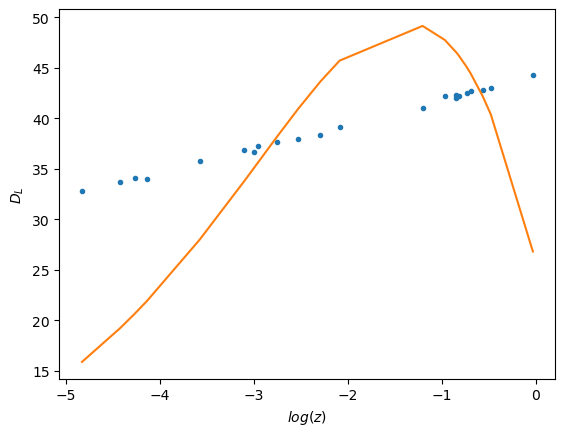

In [22]:
plt.plot(np.log(redshift),lum_dist,'.')
plt.plot(np.log(redshift),D_L_helper(redshift,omega_m,omega_lambda,H_0))
plt.xlabel("$log(z)$")
plt.ylabel("$D_L$");